# Problem
Can the sale amount for properties in Conneticut be predicted?

Also, where are the best places to buy? Best places to sell? places with the best/worst sale ratios?

Through understanding this dataset, real estate buyers and sellers in Conneticut can make smart sales and purchases.

# Data Collection
Data sourced from data.gov

https://catalog.data.gov/dataset/real-estate-sales-2001-2018

In [1]:
import pandas as pd
df = pd.read_csv(
    'Real_Estate_Sales_2001-2023_GL.csv',
    dtype = {
        'Serial Number':'int64',
        'List Year':'int64',
        'Date Recorded':'string',
        'Town':'string',
        'Address':'string',
        'Assessed Value':'float64',
        'Sale Amount':'float64',
        #'Sales Ratio':'float64', This crashes since there is a value which cannot be converted to a float
        'Property Type':'string',
        'Residential Type':'string',
        'Non Use Code':'string',
        'Assessor Remarks':'string',
        'OPM remarks':'string',
        'Location':'string',
    },
)

C:\Users\jonah\AppData\Local\Temp\ipykernel_32796\893056073.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


# Data Understanding

In [2]:
df.shape

(1141722, 14)

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


In [4]:
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1141717,230299,2023,04/19/2024,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,<NA>,POINT (-72.86373 41.56032)
1141718,230568,2023,05/15/2024,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.97401 41.24665)
1141719,230217,2023,02/20/2024,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.88193 41.62094)
1141720,230097,2023,05/30/2024,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,<NA>,<NA>,DEVELOPERS LOT FOR NEW CONST,<NA>,POINT (-72.30557 41.29054)
1141721,230383,2023,06/06/2024,Shelton,512 ANTELOPE TRL,306460.0,659813.0,0.4645,Residential,Condo,25 - Other,89 33 512,"PER MLS CLOSING PRICE = $675,000",POINT (-73.13448 41.29345)


Sales Ratio = Assessed Value / Sale Amount

Low Sales Ratio (< 1): sold for less than assessed value -> bad for buyers, good for sellers

High sales Ratio (> 1): sold for more than assessed value -> good for buyers, bad for sellers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  string 
 3   Town              1141722 non-null  string 
 4   Address           1141671 non-null  string 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   string 
 9   Residential Type  738804 non-null   string 
 10  Non Use Code      324807 non-null   string 
 11  Assessor Remarks  181090 non-null   string 
 12  OPM remarks       14346 non-null    string 
 13  Location          341241 non-null   string 
dtypes: float64(2), int64(2), object(1), string(9)
memory usage: 121.9+ MB


In [6]:
print('Null values:')
for col in df.columns:
    print(f'{col}: {df.shape[0]-df[col].count()}')

Null values:
Serial Number: 0
List Year: 0
Date Recorded: 2
Town: 0
Address: 51
Assessed Value: 0
Sale Amount: 0
Sales Ratio: 0
Property Type: 382446
Residential Type: 402918
Non Use Code: 816915
Assessor Remarks: 960632
OPM remarks: 1127376
Location: 800481


Values like Non Use Code, Assessor Remarks, OPM remarks, Location have over half of their entrances missing

In [7]:
for col in df.columns:
    print(f'{col} type: {pd.api.types.infer_dtype(df[col])}')
    #print(f'{df[col].apply(type).value_counts()}\n')

Serial Number type: integer
List Year type: integer
Date Recorded type: string
Town type: string
Address type: string
Assessed Value type: floating
Sale Amount type: floating
Sales Ratio type: mixed
Property Type type: string
Residential Type type: string
Non Use Code type: string
Assessor Remarks type: string
OPM remarks type: string
Location type: string


In [8]:
print(df['Date Recorded'].value_counts())

Date Recorded
07/01/2005    877
08/01/2005    859
07/01/2004    840
06/30/2005    828
09/30/2005    781
             ... 
01/15/2024      1
08/01/2009      1
07/03/2009      1
02/01/2009      1
09/01/2024      1
Name: count, Length: 7382, dtype: Int64


# Preprocessing

## Data Cleaning

Date Recorded seems to have some bad values. There many rows that have years listed in Date Recorded listed as 0023 and 2024. 

In [9]:
bad_dates = []
for i in range(1,13):
    month = ''
    if i < 10:
        month += '0'
    month += str(i)
    for j in range(1,32):
        day = ''
        if j < 10:
            day += '0'
        day += str(j)
        for k in range(23,25):
            bad_dates.append(f'{month}/{day}/00{k}')
            
count = 0
for bad_date in bad_dates:
    if df['Date Recorded'].isin([bad_date]).any():
        count += 1
        good_date = bad_date[:6] + '2' + bad_date[7:]
        df['Date Recorded'] = df['Date Recorded'].replace(bad_date,good_date)

df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
f'{count} bad dates'

'140 bad dates'

Sales Ratio should contain only floats, but df.info() shows it to have an object Dtype. Why is this?

In [10]:
df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64

Since this column contains floats and strings, we need to convert all of the strings to floats

In [11]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        print(x)
        return False
sales_ratio_strings = df['Sales Ratio'][df['Sales Ratio'].apply(lambda x: not isinstance(x, float))]
sales_ratio_strings.apply(is_float).value_counts()

1,787.3333


Sales Ratio
True     27609
False        1
Name: count, dtype: int64

Of all the strings in df['Sales Ratio'], there is only one which cannot be converted to a float, so we can fix this individual datapoint.

Now every element in df['Sales Ratio'] is a float

We can also convert df['Date Recorded'] to datetimes.

In [12]:
df['Sales Ratio'] = df['Sales Ratio'].replace('1,787.3333','1787.3333')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'])

df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1141722
Name: count, dtype: int64

In [13]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       190628
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         9957
Commercial          7828
Four Family         2150
Apartments          1646
Industrial          1029
Public Utility        12
Name: count, dtype: Int64

In [14]:
df['Residential Type'].value_counts()

Residential Type
Single Family    535359
Condo            145436
Two Family        37173
Three Family      17670
Four Family        3166
Name: count, dtype: Int64

In [15]:
row = 500000
df[['Property Type','Residential Type']][row:row + 10]

,Property Type,Residential Type
500000,Two Family,Two Family
500001,Single Family,Single Family
500002,Three Family,Three Family
500003,<NA>,<NA>
500004,Single Family,Single Family
500005,<NA>,<NA>
500006,Single Family,Single Family
500007,Two Family,Two Family
500008,<NA>,<NA>
500009,Single Family,Single Family


It seems that some values in Residential Type have been copied to Property type. To keep these columns independent of eachother, the copied data will be replaced with 'Residential'

In [16]:
import numpy as np
for res_type in df['Residential Type'].unique():
    df.loc[df['Residential Type']==res_type,'Property Type'] = res_type
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


In [17]:
street = df['Address'].str.lstrip('0123456789 ~`!@#$%^&*()-+={}[]\\:;\'"<>,./?').str.rstrip('0123456789 ~`!@#$%^&*()-+={}[]\\:;\'"<>,./?')

street = street.mask(
    street.str.contains(
        "MAIN ST", 
        case=False,
        na=False
    ),
    "MAIN ST"
)


df.insert(len(df.columns),'Street',street)

Remove invalid rows

In [18]:
df = df[df['Non Use Code'].isna()]

In [19]:
month_sold = df['Date Recorded'].dt.month.astype('Int64')
df.insert(len(df.columns),'Month Sold',month_sold)
year_sold = df['Date Recorded'].dt.year.astype('Int64')
df.insert(len(df.columns),'Year Sold',year_sold)
years_on_market = year_sold - df['List Year']
df.insert(len(df.columns),'Years on Market',years_on_market)
df.head()#make histogram to justify removing yom < 0

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014),BEAVER ST,4,2021,1
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,<NA>,<NA>,<NA>,<NA>,JACKSON ST,5,2021,1
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>,WAKELEE AVE,9,2021,1
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,<NA>,<NA>,<NA>,<NA>,PLATT ST,12,2020,0
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988),BYRON DRIVE,6,2022,1


In [20]:
df = df[df['Years on Market']>=0]

Fill missing data

In [21]:
df = df[df['Date Recorded'].notnull()]
for col in df.select_dtypes(include='string'):
    df[col] = df[col].fillna('Missing')

Now there are no more mixed types

In [22]:
df.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Month Sold,Year Sold,Years on Market
count,8.168710e+05,816871.000000,816871,8.168710e+05,8.168710e+05,816871.000000,816871.0,816871.0,816871.0
mean,6.053749e+05,2011.552516,2012-10-29 16:55:00.253773056,2.409097e+05,4.154772e+05,0.795164,6.875324,2012.299931,0.747415
min,2.100000e+01,2001.000000,2001-10-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,1.0,2001.0,0.0
25%,3.071800e+04,2004.000000,2005-09-23 00:00:00,9.555000e+04,1.720000e+05,0.472740,4.0,2005.0,0.0
50%,8.042100e+04,2012.000000,2012-12-17 00:00:00,1.481900e+05,2.599000e+05,0.578831,7.0,2012.0,1.0
75%,1.804270e+05,2018.000000,2019-09-27 00:00:00,2.373300e+05,4.004000e+05,0.691492,10.0,2019.0,1.0
max,2.000500e+09,2023.000000,2024-10-02 00:00:00,1.106702e+08,1.630000e+08,165060.000000,12.0,2024.0,3.0
std,8.074416e+06,7.191449,NaN,6.905130e+05,1.238287e+06,182.627422,3.204785,7.194271,0.434509


Outlier for 165060

[Text(0, 0, '816870'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

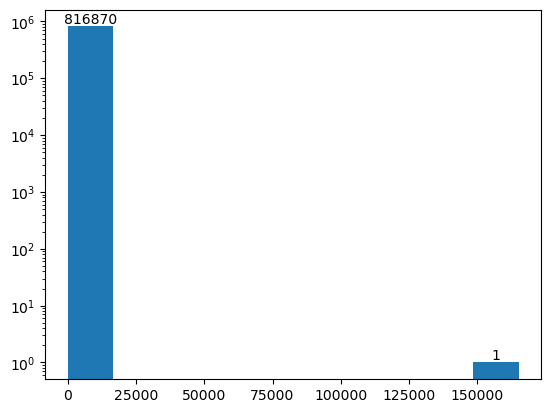

In [23]:
from matplotlib import pyplot as plt
_,_, bar = plt.hist(df['Sales Ratio'])    
plt.yscale('log')
plt.bar_label(bar)

Removing outliers:

[Text(0, 0, '816667'),
 Text(0, 0, '179'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

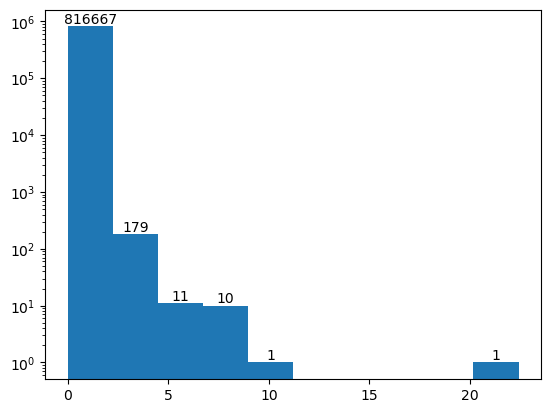

In [24]:
'''
threshold = df['Assessed Value'].nlargest(1).min()
df = df[df['Assessed Value'] < threshold]
threshold = df['Sale Amount'].nlargest(1000).min()
df = df[df['Sale Amount'] < threshold]
'''
threshold = df['Sales Ratio'].nlargest(2).min()
df = df[df['Sales Ratio'] < threshold]

_,_, bar = plt.hist(df['Sales Ratio'])
plt.yscale('log')
plt.bar_label(bar)

In [25]:
categoric_columns = [
    'List Year',
    'Property Type',
    'Month Sold',
    'Year Sold',
    'Years on Market',
]

large_categoric_columns = [
    'Town',
    'Address',
    'Assessor Remarks',
    'OPM remarks',
    'Location',	
    'Street',
]

for col in categoric_columns:
    df[col] = df[col].astype('category')
    
for col in large_categoric_columns:
    df[col] = df[col].astype('category')


# Model Planning

In [26]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,Missing,Missing,Missing,POINT (-73.06822 41.35014),BEAVER ST,4,2021,1
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,Missing,Missing,Missing,Missing,JACKSON ST,5,2021,1
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Missing,Missing,Missing,Missing,Missing,WAKELEE AVE,9,2021,1
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,Missing,Missing,Missing,Missing,PLATT ST,12,2020,0
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,Missing,Missing,Missing,POINT (-72.879115982 41.773452988),BYRON DRIVE,6,2022,1


## Numeric Data

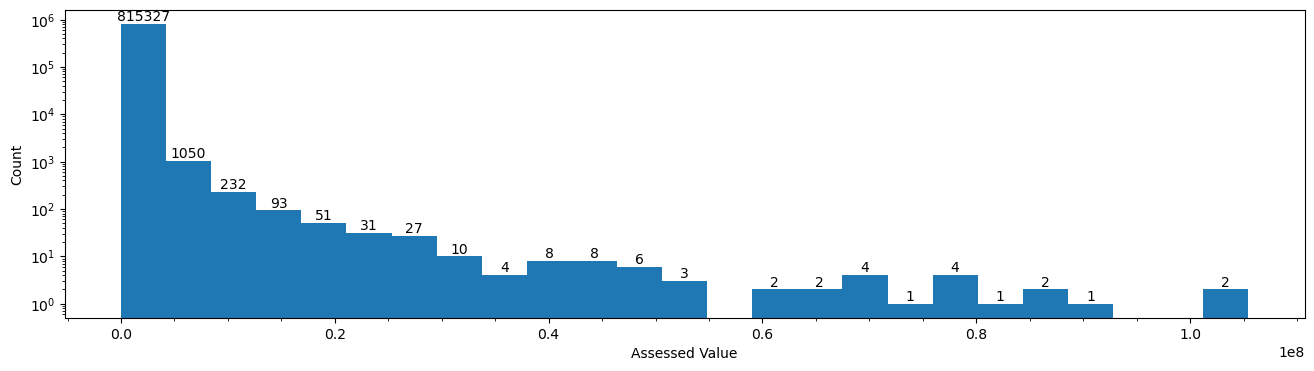

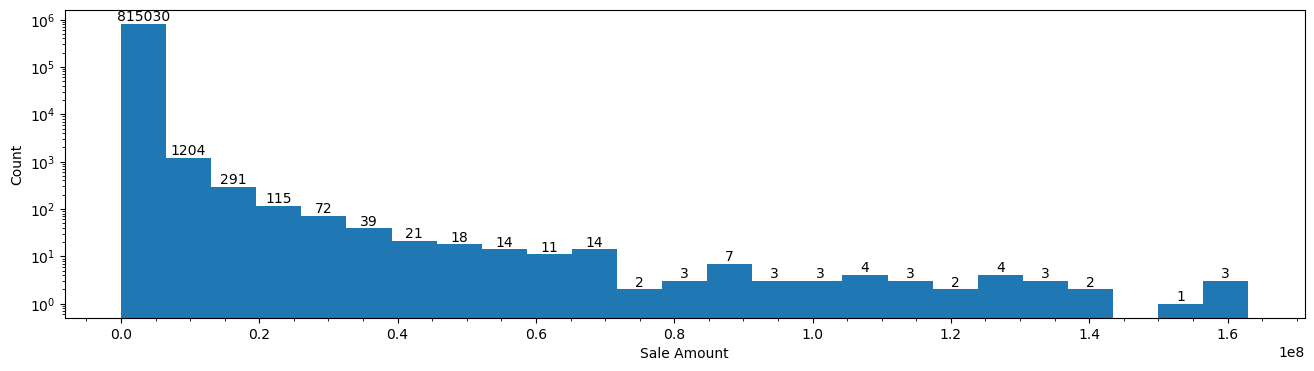

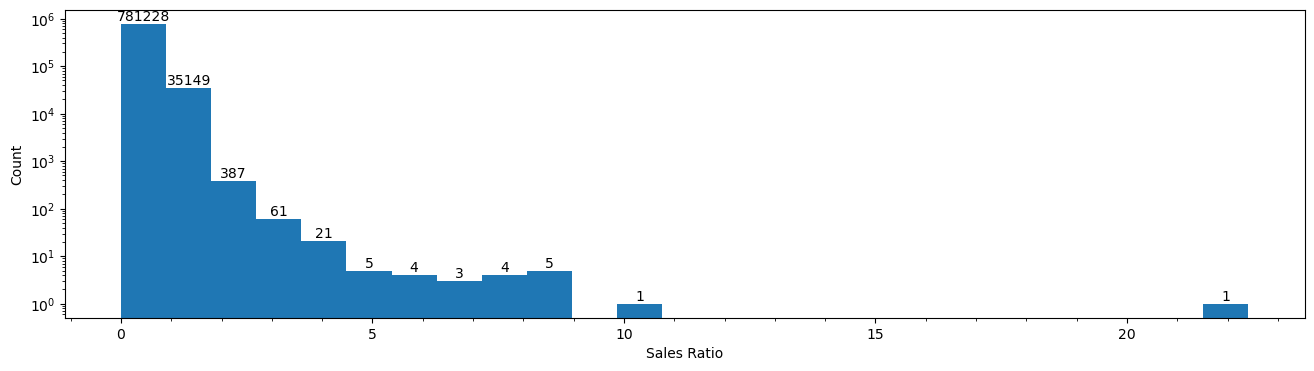

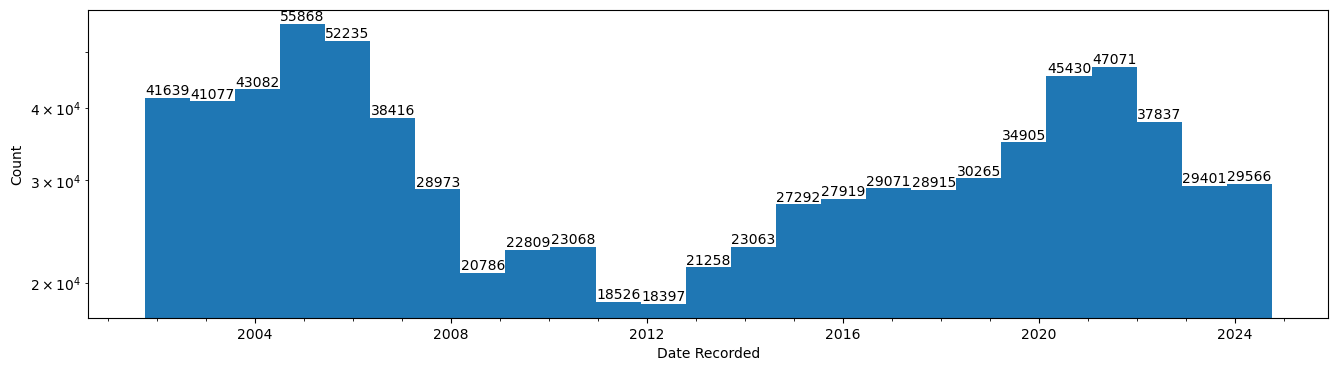

In [27]:
numeric_columns = [
    'Assessed Value',
    'Sale Amount',
    'Sales Ratio',
    'Date Recorded',

]

for col in numeric_columns:
    plt.figure(figsize=(16,4))
    _, _, bar = plt.hist(df[col], bins = 25)
    plt.bar_label(bar)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.minorticks_on()
    plt.show()

## Categoric Data

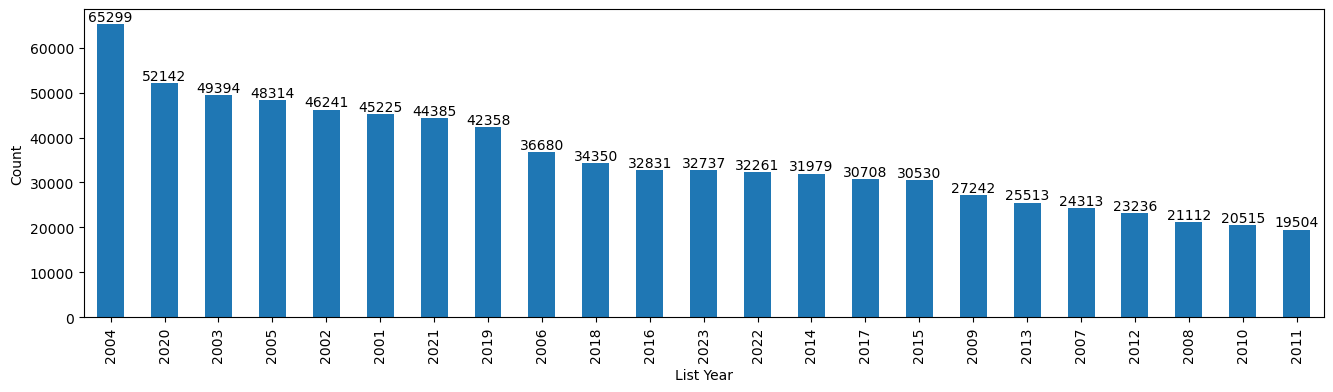

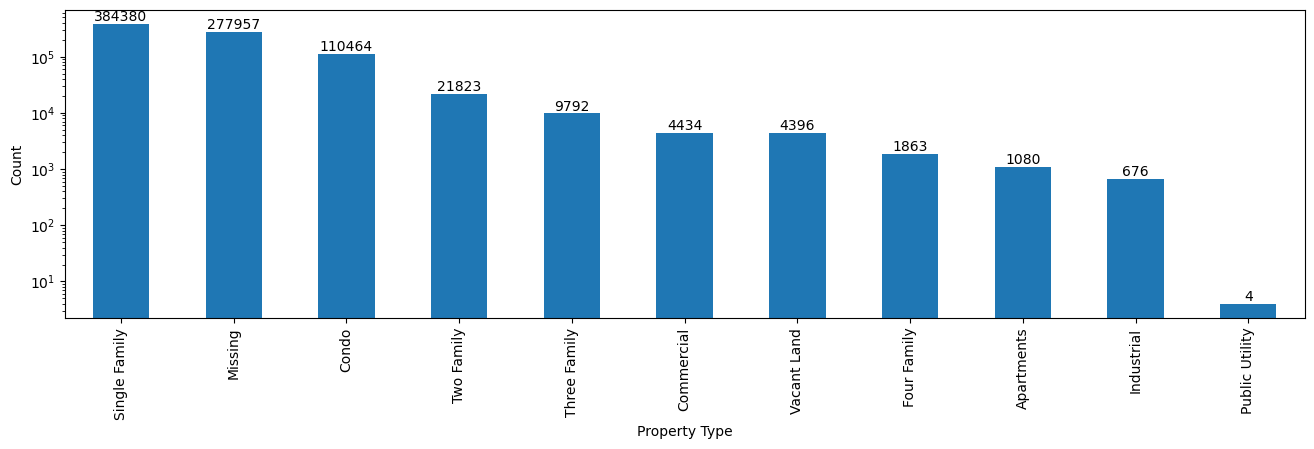

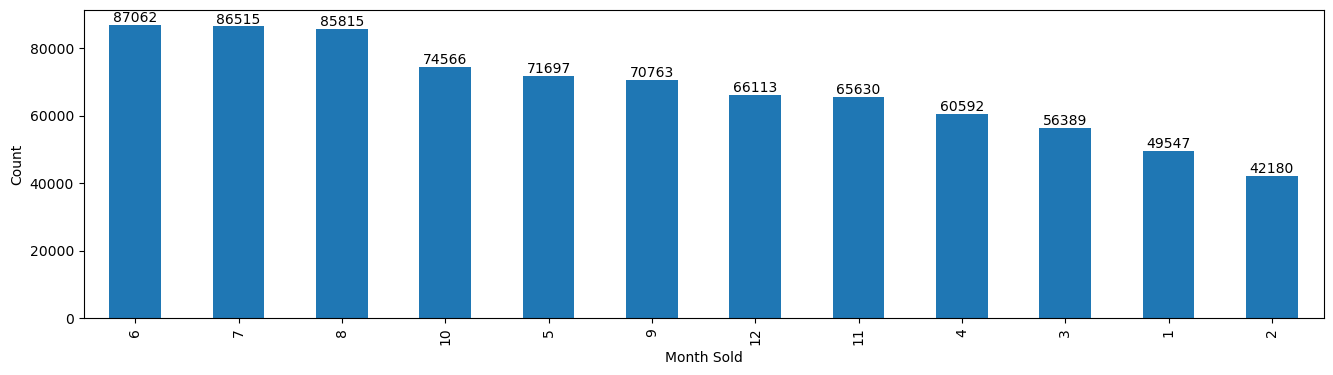

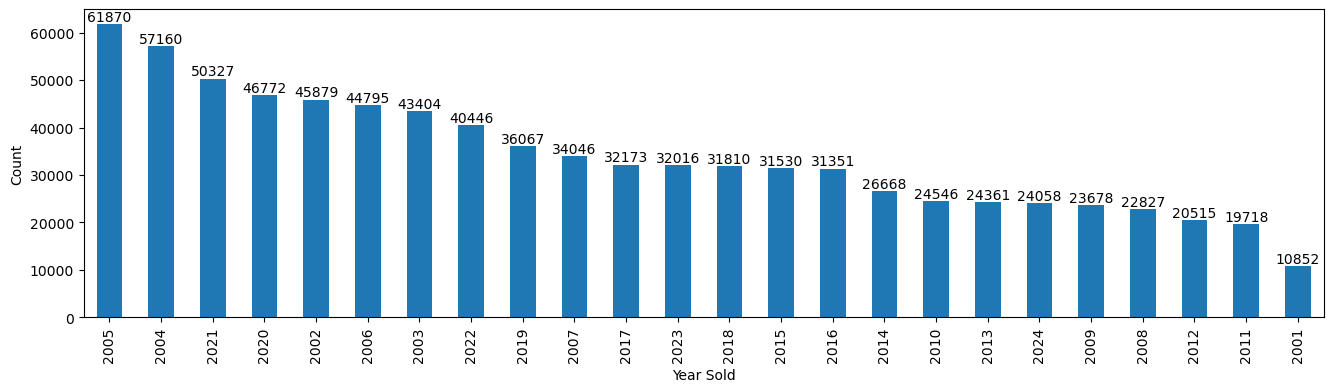

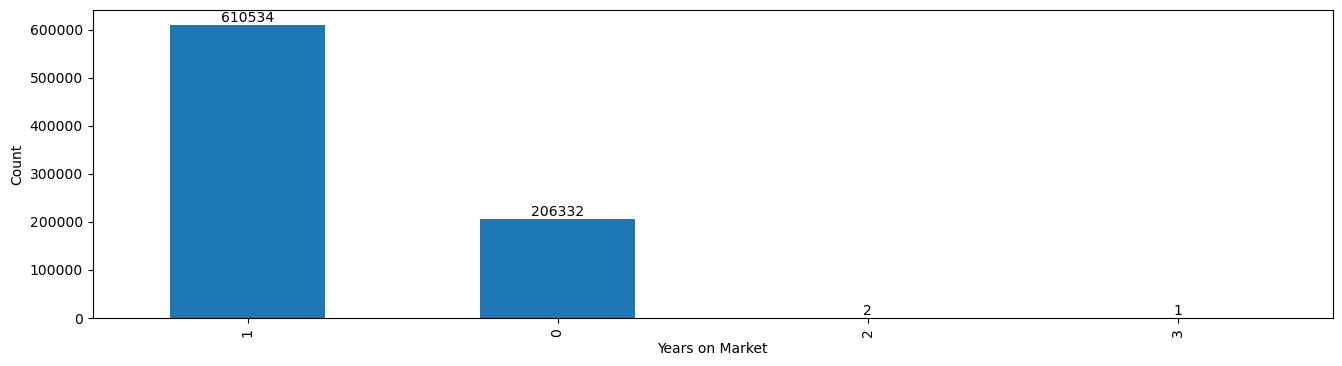

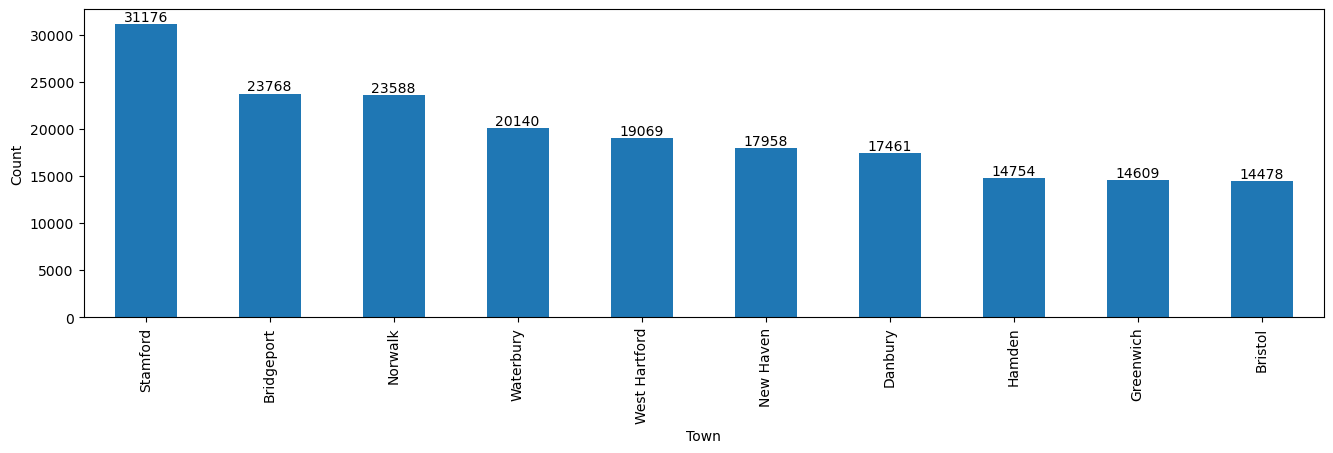

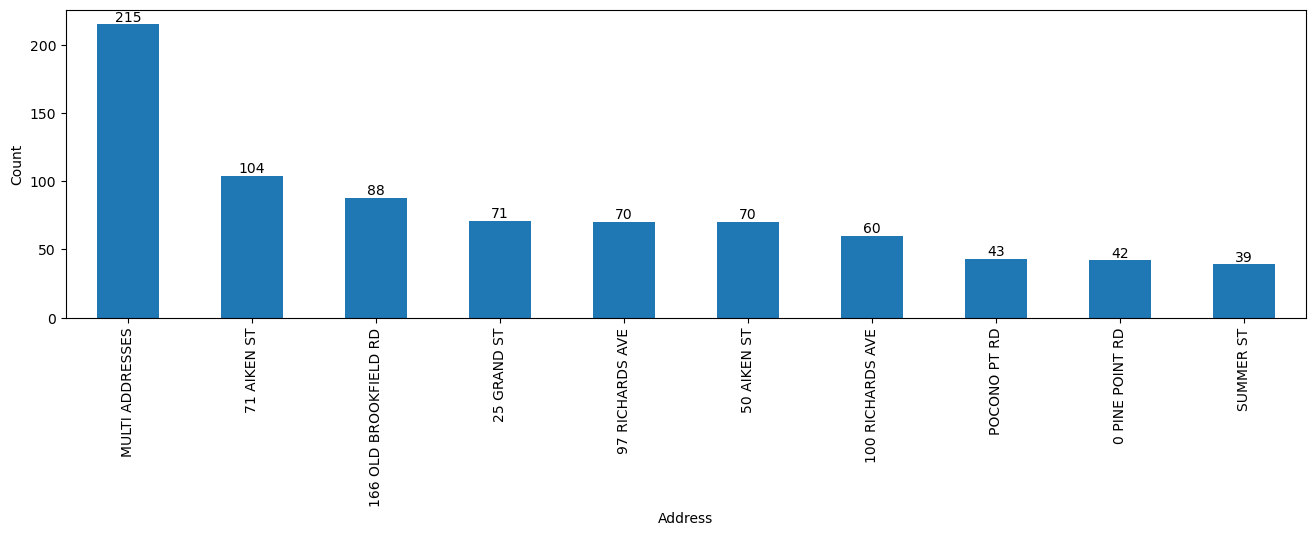

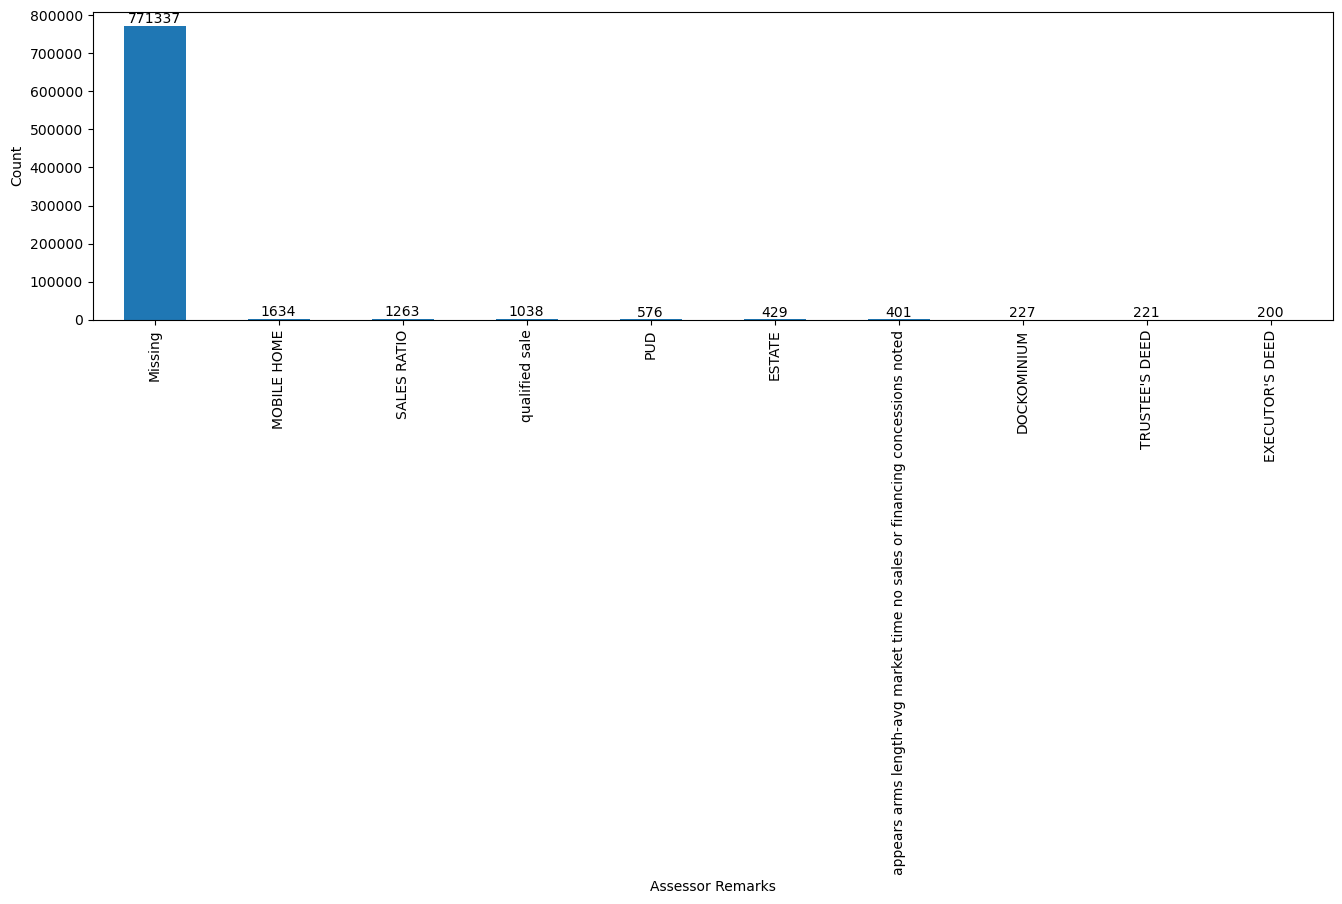

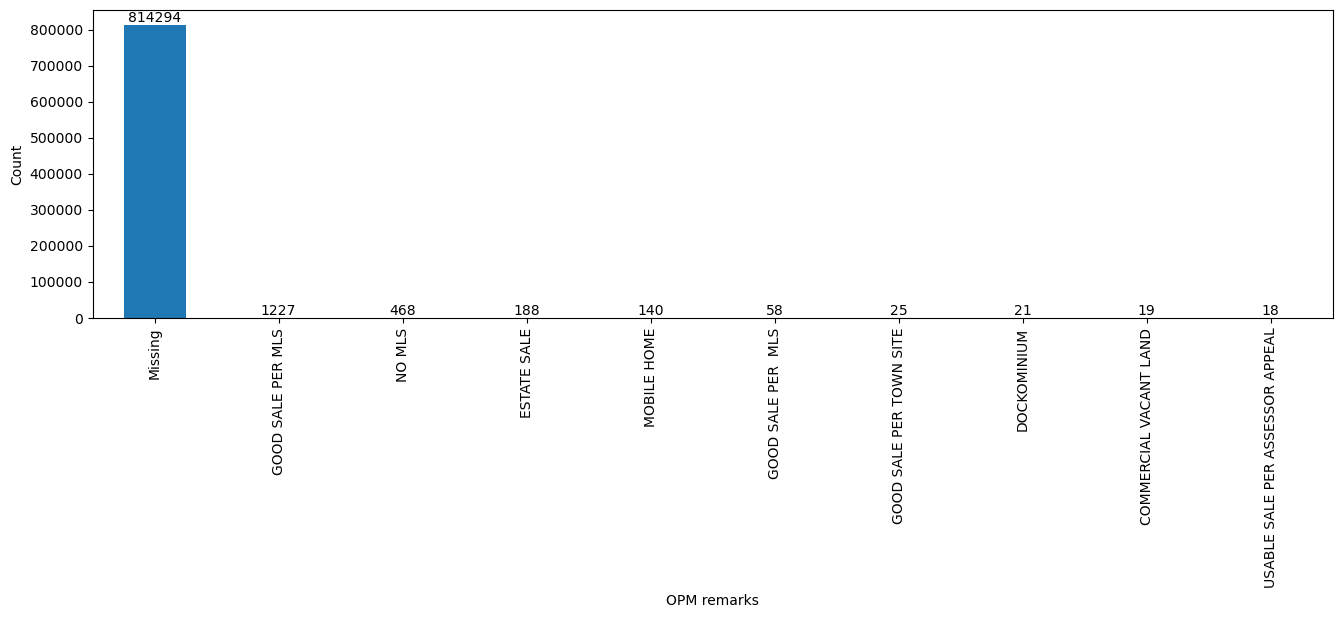

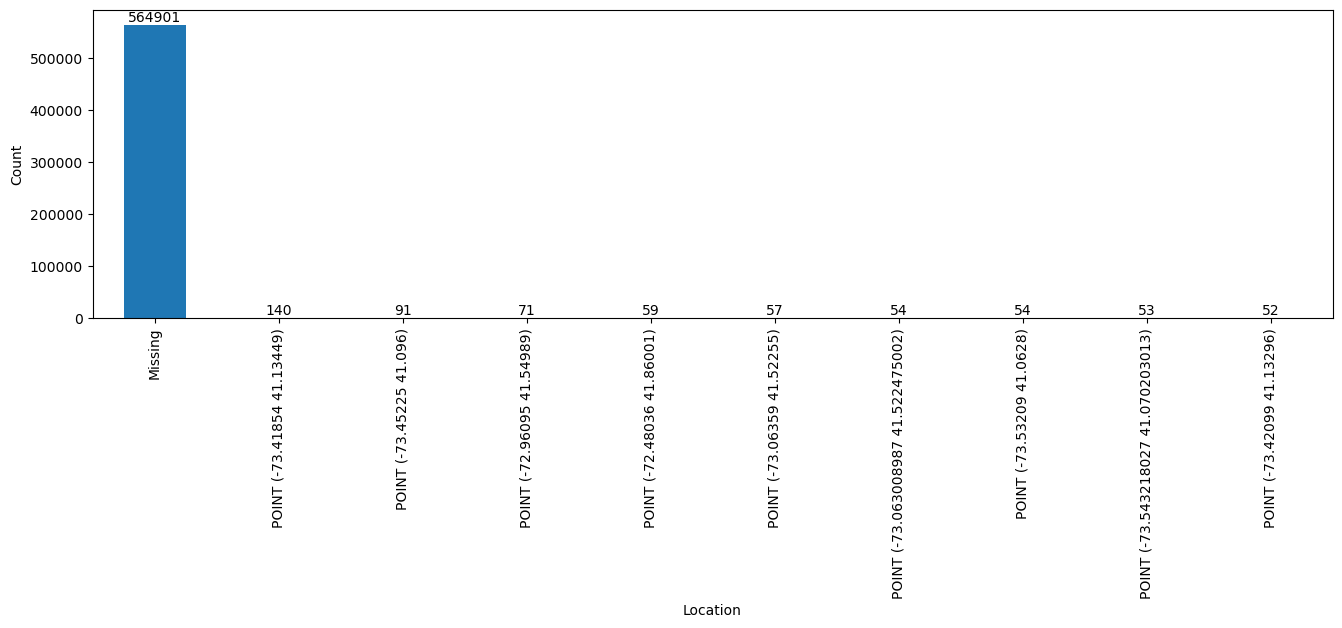

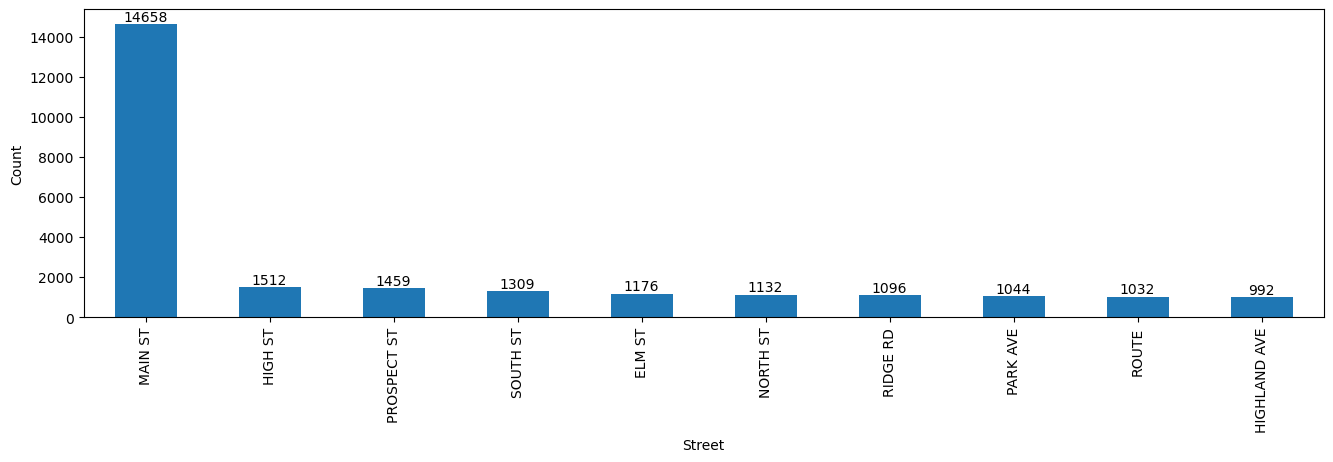

In [28]:
for col in categoric_columns:
    plt.figure(figsize=(16,4))
    if col == 'Property Type':
        plt.yscale('log')
    ax = df[col].value_counts().plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()


for col in large_categoric_columns:
    plt.figure(figsize=(16,4))
    ax = df[col].value_counts().nlargest(10).plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()

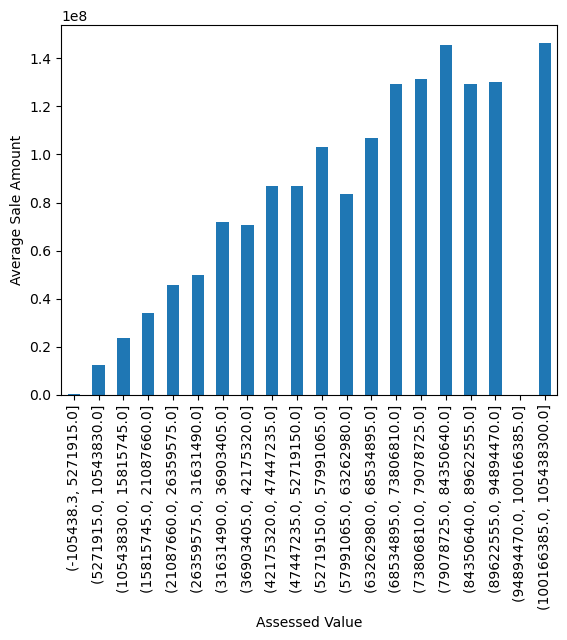

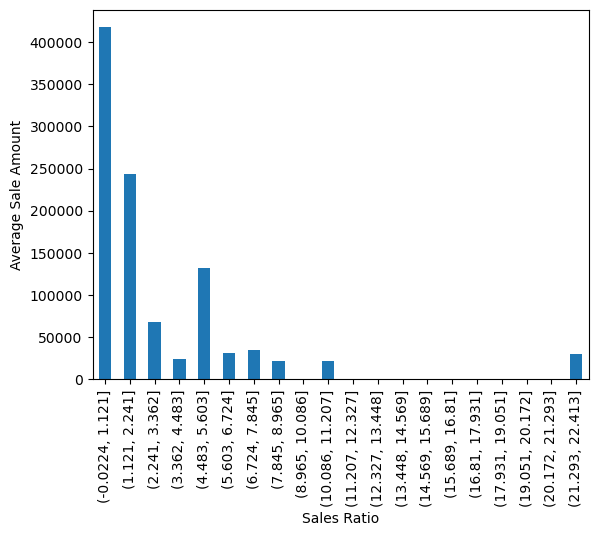

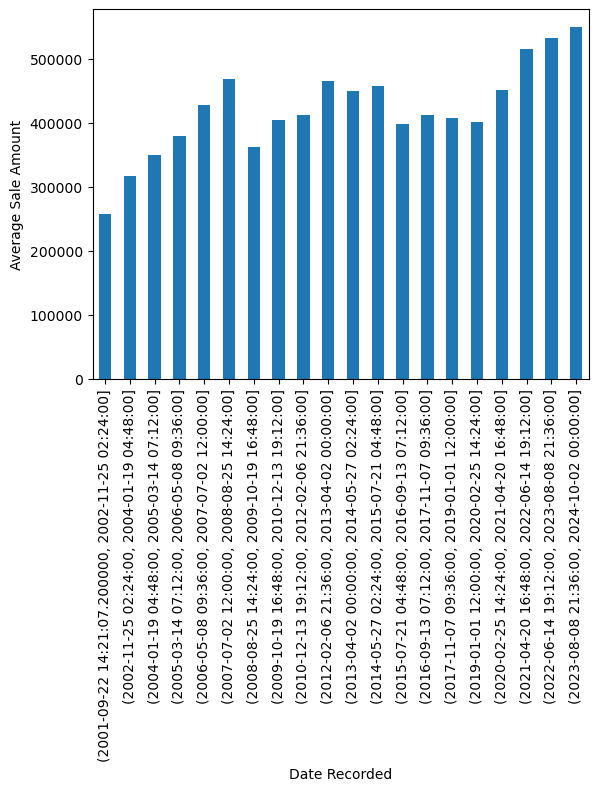

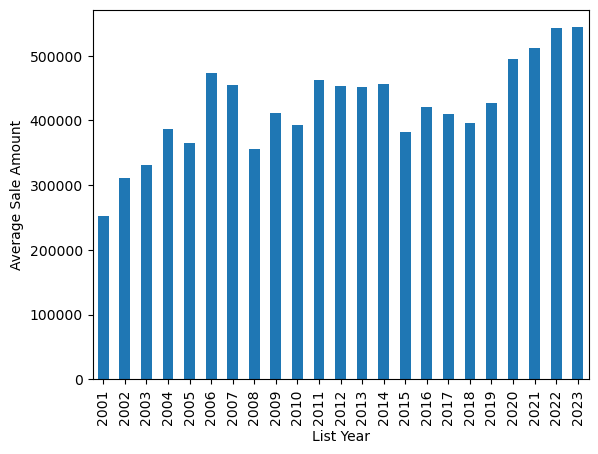

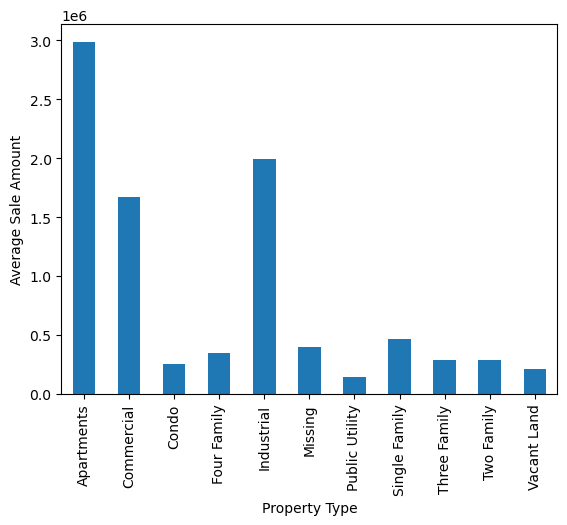

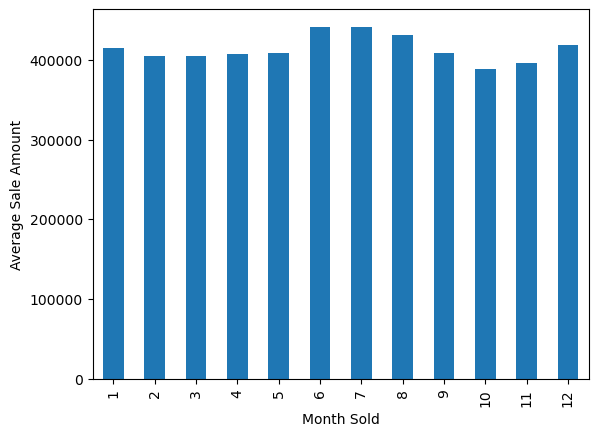

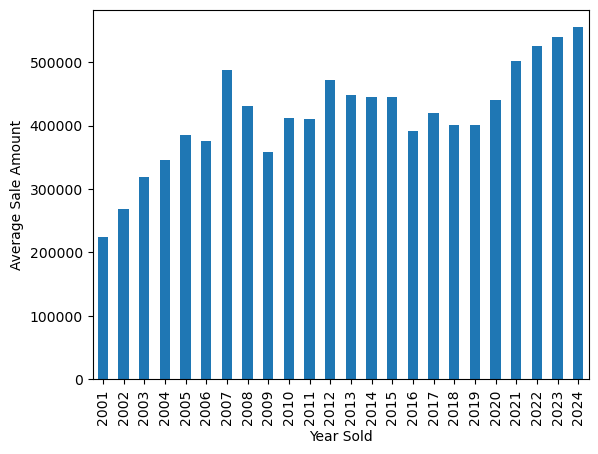

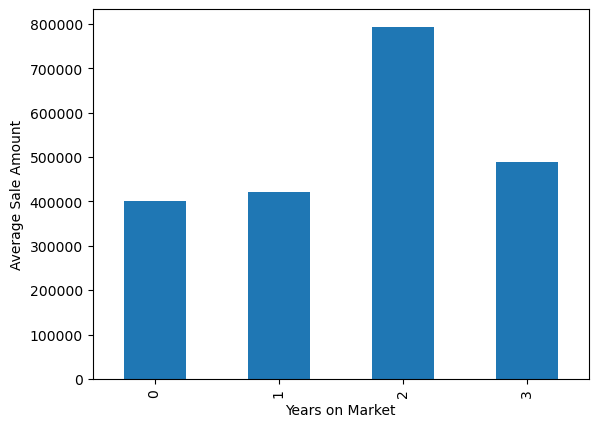

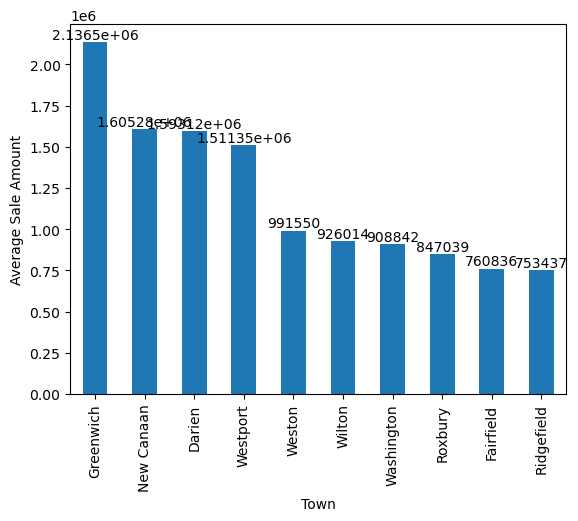

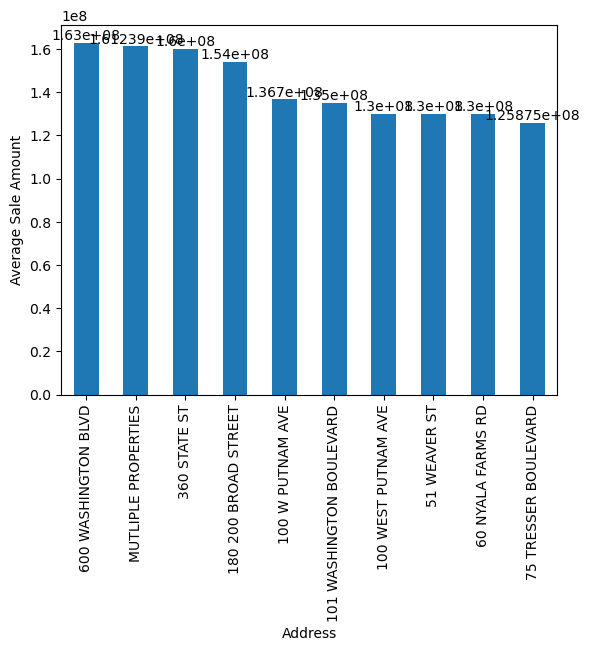

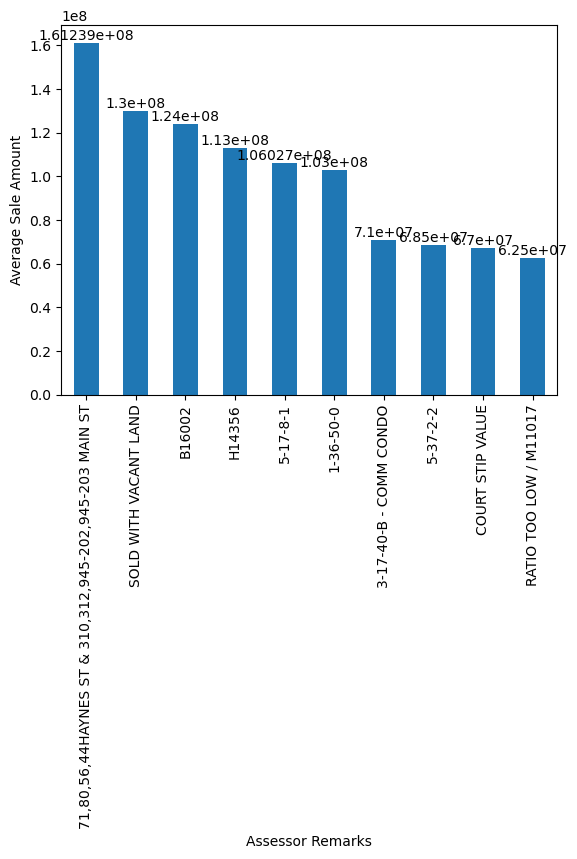

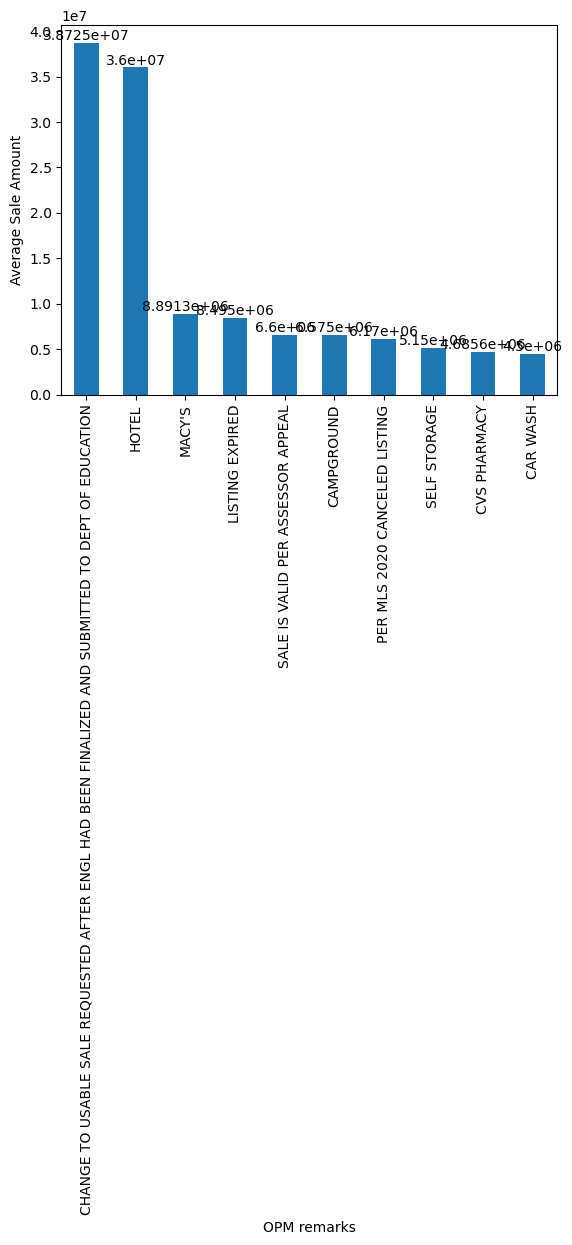

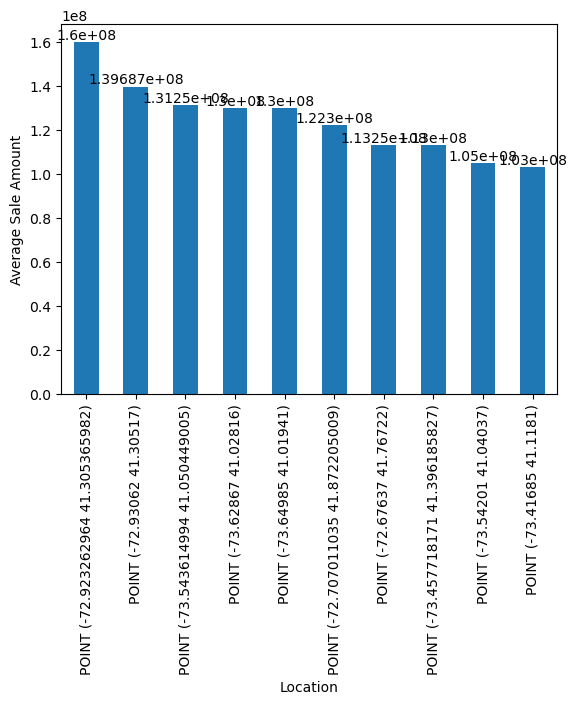

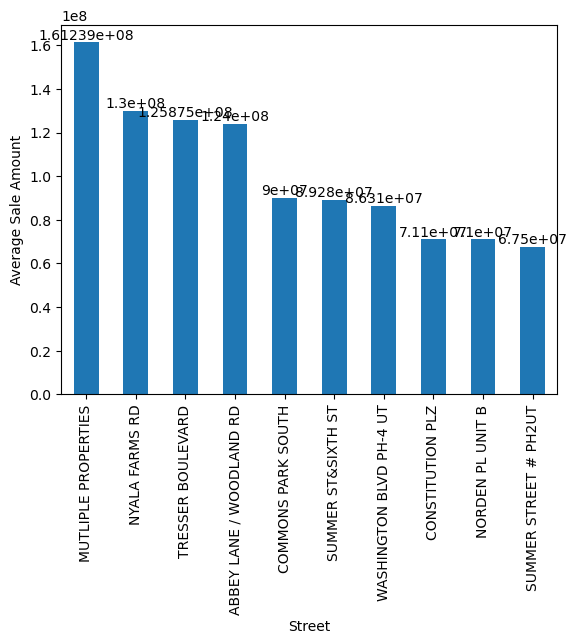

In [41]:
results = numeric_columns[1]

for col in numeric_columns:
    if col == results:
        continue
    df.groupby(pd.cut(df[col],bins = 20),observed=False)[results].mean().plot(kind = 'bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in categoric_columns:
    ax = df.groupby(col,observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()


for col in large_categoric_columns:
    ax = df.groupby(col,observed=False)[results].mean().nlargest(10).plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel(f'Average {results}')
    plt.show()

In [30]:
df.nlargest(5, 'Sales Ratio').sort_values(by = 'Sales Ratio', ascending = False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
33097,200018,2020,2020-10-07,Norwich,202 R NORTH WAWECUS HILL RD,672400.0,30000.0,22.413300,Vacant Land,Missing,Missing,VACANT LAND W/ OUTBUILDINGS,Missing,Missing,R NORTH WAWECUS HILL RD,10,2020,0
31610,200268,2020,2021-01-08,Norwich,174 WEST TOWN ST,229700.0,22000.0,10.440900,Commercial,Missing,Missing,Missing,Missing,Missing,WEST TOWN ST,1,2021,1
656943,11001,2011,2011-10-03,Chester,46 STRAITS RD,396440.0,45000.0,8.809778,Single Family,Single Family,Missing,Missing,Missing,Missing,STRAITS RD,10,2011,0
52339,200319,2020,2021-01-20,Norwich,303 MOHEGAN PARK RD #57,46700.0,5405.0,8.640100,Single Family,Single Family,Missing,Missing,Missing,POINT (-72.0655 41.55307),MOHEGAN PARK RD,1,2021,1
656073,11004,2011,2011-10-04,Chester,84 WIG HILL RD,231950.0,27000.0,8.590741,Single Family,Single Family,Missing,Missing,Missing,Missing,WIG HILL RD,10,2011,0


# Model Building

## Pipeline

OneHotEncoder is best for categorical features, but since this dataset involves high-cardinality categorical features like Street, OneHotEncoder is impractical and will use too much memory. Instead, we can use TargetEncoder 

change^

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lars, BayesianRidge, ARDRegression, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, TargetEncoder, OneHotEncoder



small_encoder = OneHotEncoder(handle_unknown='warn')
large_encoder = TargetEncoder()


column_trans = ColumnTransformer(
    transformers=[
        (
            'small_encode',
            small_encoder,
            [                
                'Property Type',
                'Month Sold',
            ]
        ),
        (
            'large_encode',
            large_encoder,
            [
                'Town',
                'Street',        
            ]
        ),
    ],
    remainder='passthrough'
)

pipe = Pipeline(
    steps=[
        (
            'encode',
            column_trans,
        ),
        (
            'scale',
            StandardScaler(),
        ),
        (
            'estimator',
            Ridge(),
        ),
    ],
)

estimators = [
    {
        'estimator':[LinearRegression()],
    },
    {
        'estimator':[Ridge()],
        'estimator__alpha':np.linspace(0.1,10,10),
    },
    #{
        #'estimator':[Lars()],
    #},

    #{
        #'estimator':[BayesianRidge()],
        #'estimator__alpha_1':np.linspace(1e-6,10,3),
        #'estimator__alpha_2':np.linspace(1e-6,10,3),
        #'estimator__lambda_1':np.linspace(1e-6,10,3),
        #'estimator__lambda_2':np.linspace(1e-6,10,3),
    #},
    {
        'estimator':[ARDRegression()],        
        #'estimator__alpha_1':np.linspace(1e-6,10,3),
        #'estimator__alpha_2':np.linspace(1e-6,10,3),
        #'estimator__lambda_1':np.linspace(1e-6,10,3),
        #'estimator__lambda_2':np.linspace(1e-6,10,3),
    },
    #{
    #    'estimator':[RANSACRegressor()]
    #},
    
    ]
#estimators = [{
#        'estimator':[Ridge()],
#}]

grid = GridSearchCV(
    pipe,
    estimators,
    n_jobs=20,
)

In [32]:
X = df[['List Year','Date Recorded','Town','Assessed Value','Property Type','Street','Month Sold','Year Sold','Years on Market']].copy()

X['Date Recorded'] = X['Date Recorded'].map(lambda x: x.toordinal())

y = df['Sale Amount']
X.head()

,List Year,Date Recorded,Town,Assessed Value,Property Type,Street,Month Sold,Year Sold,Years on Market
0,2020,737894,Ansonia,133000.0,Single Family,BEAVER ST,4,2021,1
1,2020,737936,Ansonia,110500.0,Three Family,JACKSON ST,5,2021,1
2,2020,738046,Ansonia,150500.0,Commercial,WAKELEE AVE,9,2021,1
3,2020,737773,Ansonia,127400.0,Two Family,PLATT ST,12,2020,0
4,2021,738326,Avon,179990.0,Condo,BYRON DRIVE,6,2022,1


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)

grid.cv_results_

{'mean_fit_time': array([ 3.80843344,  4.18445988,  4.43544493,  4.69979095,  4.1953167 ,
         4.37827039,  4.42049823,  4.44058108,  3.67707062,  3.75581474,
        89.10053096]),
 'std_fit_time': array([0.07687151, 0.19740684, 0.11721986, 0.04004565, 0.11996534,
        0.08446579, 0.07754303, 0.10762114, 0.13307356, 0.052256  ,
        0.26290257]),
 'mean_score_time': array([0.90753894, 0.86253071, 0.83559384, 0.68027153, 0.84492135,
        0.81057806, 0.70468054, 0.66876864, 0.72094059, 0.57079034,
        0.34955096]),
 'std_score_time': array([0.05376374, 0.04834383, 0.03365482, 0.05185627, 0.06828126,
        0.04507769, 0.06573582, 0.02141228, 0.04175733, 0.0271978 ,
        0.07513678]),
 'param_estimator': masked_array(data=[Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(),
                    Ridge(), Ridge(), Ridge(), Ridge(), ARDRegression()],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
  

# Results

Ridge(alpha=np.float64(10.0))


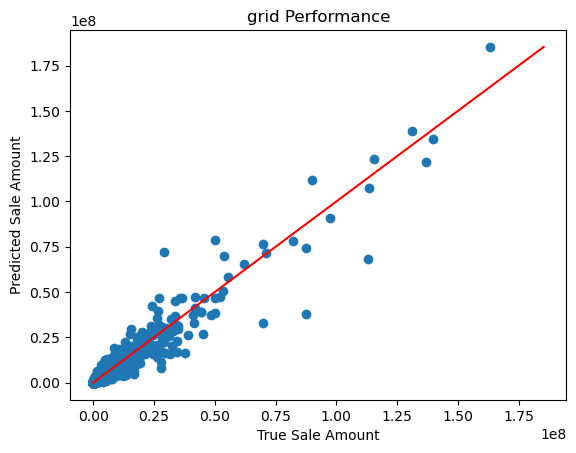

[ 1.90490940e+04  6.57057587e+03 -1.40184350e+04 -8.36762047e+02
  8.84595141e+03  4.24290827e+04 -2.49398775e+02 -3.15416700e+04
 -3.75187440e+02 -4.23499636e+03 -3.17110445e+03 -8.05493785e+02
 -6.82688964e+02 -1.28224739e+03  5.07844565e+02  8.88984233e+02
  2.38874181e+03  3.33218684e+03  2.50949258e+03  1.92378812e+03
 -3.10619249e+03 -3.42234482e+03 -3.52772360e+03 -2.33564049e+04
 -3.06874414e+03  7.23117935e+02  3.50560013e+04  1.15759329e+06
  5.00893489e+02 -3.67450434e+03]
r2_mean=-6.466139355065792e-07
r2_train=0.8961225754985447 r2_test=0.9236453977648511


In [34]:
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay

best_pipe = grid.best_estimator_
best_model = best_pipe['estimator']
print(best_model)

x = np.linspace(min(min(y_test),min(y_pred)), max(max(y_test),max(y_pred)), 100)

plt.plot(x, x, color='red')

plt.scatter(y_test,y_pred)

plt.title('grid Performance')
plt.xlabel('True Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.show()

r2_train = grid.score(X_train, y_train)
r2_test = grid.score(X_test, y_test)

y_mean = np.full(len(y_test),y.mean())
r2_mean = r2_score(y_test,y_mean)

print(best_model.coef_)

print(f'{r2_mean=}')

print(f'{r2_train=}', f'{r2_test=}')

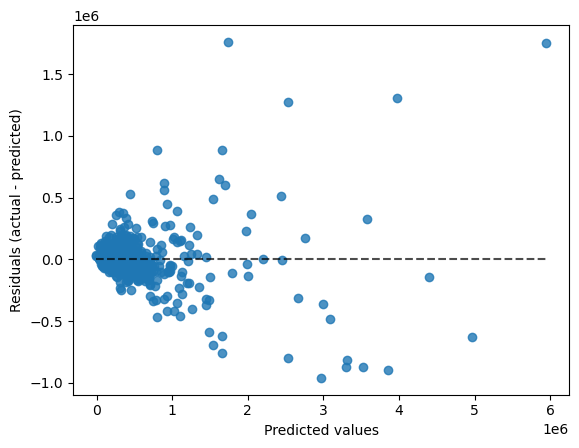

In [35]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_test,y_pred)

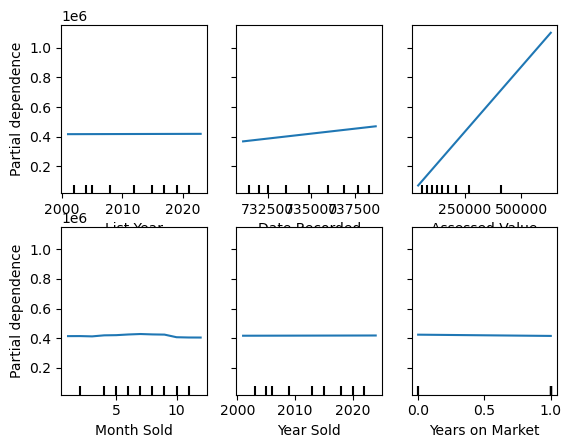

In [36]:
num_features = ['List Year','Date Recorded','Assessed Value','Month Sold','Year Sold','Years on Market']
PartialDependenceDisplay.from_estimator(best_pipe, X_test, num_features)

<Axes: >

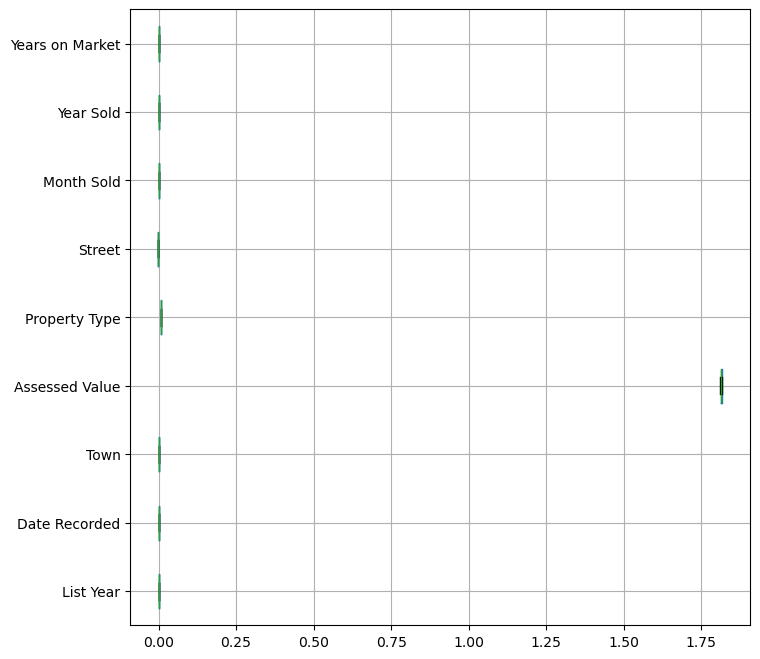

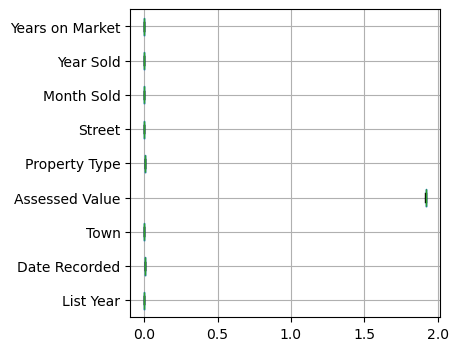

In [37]:
from sklearn.inspection import permutation_importance
# fix with DRY
result = permutation_importance(
    best_pipe,
    X_train, 
    y_train,  
    n_jobs=20,
)

fig, ax = plt.subplots(figsize=(8,8))
pd.DataFrame(
    result.importances.T,
    columns=X_test.columns
).boxplot(vert=False,whis=10,ax=ax)

result = permutation_importance(
    best_pipe,
    X_test, 
    y_test,  
    n_jobs=20,
)
fig, ax = plt.subplots(figsize=(8,8))
pd.DataFrame(
    result.importances.T,
    columns=X_test.columns
).boxplot(vert=False,whis=10,ax=ax)

In [38]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('encode',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('small_encode',
                                    OneHotEncoder(handle_unknown='warn'),
                                    ['Property Type', 'Month Sold']),
                                   ('large_encode', TargetEncoder(),
                                    ['Town', 'Street'])])),
  ('scale', StandardScaler()),
  ('estimator', Ridge())],
 'estimator__transform_input': None,
 'estimator__verbose': False,
 'estimator__encode': ColumnTransformer(remainder='passthrough',
                   transformers=[('small_encode',
                                  OneHotEncoder(handle_unknown='warn'),
                                  ['Property Type', 'Month Sold']),
                                 ('large_encode', TargetEncoder(),
                                  ['Town', 'Street'])]),
 'estimator__scale': StandardS

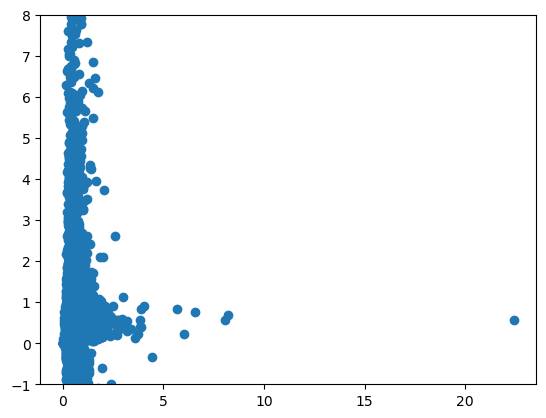

In [39]:
plt.scatter(X_test['Assessed Value']/y_test,X_test['Assessed Value']/y_pred)
plt.ylim([-1,8])
#x = np.linspace(0, max(X_test['Assessed Value']), 100)
#plt.plot(x, x, color='red')
plt.show()

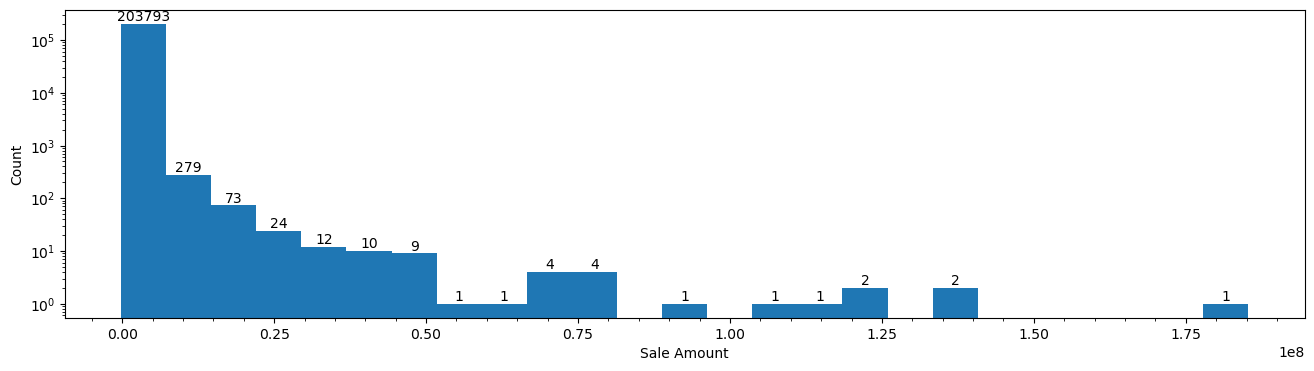

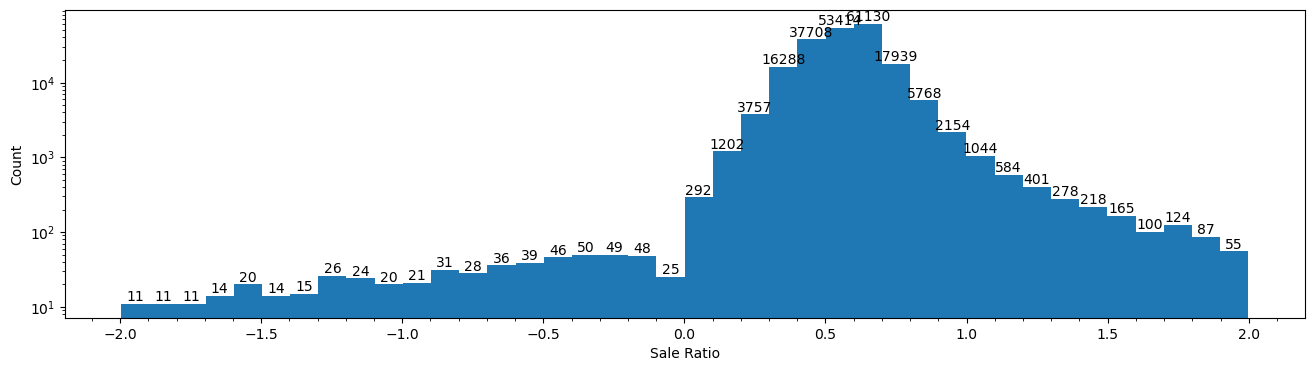

In [40]:
plt.figure(figsize=(16,4))
_, _, bar = plt.hist(y_pred, bins = 25)
plt.bar_label(bar)
plt.xlabel('Sale Amount')
plt.ylabel('Count')
plt.yscale('log')
plt.minorticks_on()
plt.show()

plt.figure(figsize=(16,4))
boundary = [-2,2]
sale_ratio_pred = X_test['Assessed Value']/y_pred
sale_ratio_pred = sale_ratio_pred[(sale_ratio_pred >=boundary[0]) & (sale_ratio_pred <=boundary[1])]
_, _, bar = plt.hist(sale_ratio_pred, bins = 10*(boundary[1]-boundary[0]))
plt.bar_label(bar)
plt.xlabel('Sale Ratio')
plt.ylabel('Count')
plt.yscale('log')

plt.minorticks_on()
plt.show()